## Exercise 2 : Clustering Method
In this exercise we will explore how each clustering algorithm discussed in the class works.

### Import Library

Import the necessary libraries

In [1523]:
!pip install kneed
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch

### Load Dataset
The dataset that we will use is a **Property Dataset**. In this dataset there will be 11 features including: <br>
- Area Category,
- Luas Tanah (m2),
- Luas Bangunan (m2),
- Jumlah Kamar,
- Jumlah Kamar Mandi,
- Tingkat/Lantai,
- Harga Penawaran (dari Owner),
- Terjual/Belum,
- Arah Hadap Rumah,
- Posisi Rumah,
- Lebar Jalan Depan Rumah (ROW). <br>

You can get the dataset from **Elearn**

Load dataset

In [1524]:
df = pd.read_csv('https://raw.githubusercontent.com/iwakkk/Data-Mining-Dataset/refs/heads/main/property_dataset.csv')

df.head(5)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Below Standard,Setro Baru Utara,30.00,60.00,2.00,1.00,2.00,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.00,170.00,5.00,4.00,2.00,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.00,250.00,5.00,5.00,2.00,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.00,600.00,5.00,5.00,2.00,5000000000,Belum,Barat,Standard,1-2 Mobil


In [1525]:
df.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai
count,307.00,307.00,307.00,306.00,306.00
mean,226.91,266.58,4.28,3.34,1.86
std,202.15,213.50,1.65,1.63,0.51
min,14.00,14.00,1.00,1.00,1.00
25%,96.00,120.00,3.00,2.00,2.00
50%,162.00,200.00,4.00,3.00,2.00
75%,286.00,332.50,5.00,4.00,2.00
max,"1,561.00","1,200.00",13.00,13.00,4.00


In [1526]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  307 non-null    object 
 1   Nama Daerah                    307 non-null    object 
 2   Luas Tanah (m2)                307 non-null    float64
 3   Luas Bangunan (m2)             307 non-null    float64
 4   Jumlah Kamar                   307 non-null    float64
 5   Jumlah Kamar Mandi             306 non-null    float64
 6   Tingkat/Lantai                 306 non-null    float64
 7   Harga Penawaran (dari Owner)   307 non-null    object 
 8   Terjual/Belum                  307 non-null    object 
 9   Arah Hadap Rumah               225 non-null    object 
 10  Posisi Rumah                   192 non-null    object 
 11  Lebar Jalan Depan Rumah (ROW)  266 non-null    object 
dtypes: float64(5), object(7)
memory usage: 29.0+ KB


Data Preparation

1. Check if there are any missing values in the data.
2. Check the percentage of null values.
3. Perform label encoding.
4. Apply feature scaling to the data.

1.

In [1527]:
df.isnull().sum()

Area Category                      1
Nama Daerah                        1
Luas Tanah (m2)                    1
Luas Bangunan (m2)                 1
Jumlah Kamar                       1
Jumlah Kamar Mandi                 2
Tingkat/Lantai                     2
Harga Penawaran (dari Owner)       1
Terjual/Belum                      1
Arah Hadap Rumah                  83
Posisi Rumah                     116
Lebar Jalan Depan Rumah (ROW)     42
dtype: int64

2.

In [1528]:
df.isnull().mean()*100

Area Category                    0.32
Nama Daerah                      0.32
Luas Tanah (m2)                  0.32
Luas Bangunan (m2)               0.32
Jumlah Kamar                     0.32
Jumlah Kamar Mandi               0.65
Tingkat/Lantai                   0.65
Harga Penawaran (dari Owner)     0.32
Terjual/Belum                    0.32
Arah Hadap Rumah                26.95
Posisi Rumah                    37.66
Lebar Jalan Depan Rumah (ROW)   13.64
dtype: float64

Since there are too many nulls but not up to 50%, it’s better to fill them in using SimpleImputer with the strategy set to 'most_frequent'

In [1529]:
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df = df_imputed

df.head(5)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240.00,300.00,4.00,3.00,2.00,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30.00,60.00,2.00,1.00,2.00,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170.00,170.00,5.00,4.00,2.00,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.00,250.00,5.00,5.00,2.00,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.00,600.00,5.00,5.00,2.00,5000000000,Belum,Barat,Standard,1-2 Mobil


In [1530]:
df.isnull().sum()

Area Category                    0
Nama Daerah                      0
Luas Tanah (m2)                  0
Luas Bangunan (m2)               0
Jumlah Kamar                     0
Jumlah Kamar Mandi               0
Tingkat/Lantai                   0
Harga Penawaran (dari Owner)     0
Terjual/Belum                    0
Arah Hadap Rumah                 0
Posisi Rumah                     0
Lebar Jalan Depan Rumah (ROW)    0
dtype: int64

Drop the column 'Nama Daerah' because all the values are different.

In [1531]:
df = df.drop(columns=['Nama Daerah'])

df.head(5)


,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,240.00,300.00,4.00,3.00,2.00,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,30.00,60.00,2.00,1.00,2.00,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,170.00,170.00,5.00,4.00,2.00,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,187.00,250.00,5.00,5.00,2.00,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,350.00,600.00,5.00,5.00,2.00,5000000000,Belum,Barat,Standard,1-2 Mobil


3.

In [1532]:
category_mapping = {
    'Sangat Premium': 1,
    'Premium': 2,
    'Standard': 3,
    'Below Standard': 4
}
df['Area Category'] = df['Area Category'].map(category_mapping)

category_mapping2 = {
    '1-2 Mobil': 2,
    '< 1 Mobil': 1,
    '> 2 Mobil' : 3
}
df['Lebar Jalan Depan Rumah (ROW)'] = df['Lebar Jalan Depan Rumah (ROW)'].map(category_mapping2)

category_mapping3 = {
    'Belum': 1
}
df['Terjual/Belum'] = df['Terjual/Belum'].map(category_mapping3)

label_encoder = LabelEncoder()

df['Posisi Rumah'] = label_encoder.fit_transform(df['Posisi Rumah'])
df['Arah Hadap Rumah'] = label_encoder.fit_transform(df['Arah Hadap Rumah'])


df.head(5)

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,3,240.00,300.00,4.00,3.00,2.00,3500000000,1,3,2,2
1,4,30.00,60.00,2.00,1.00,2.00,287799000,1,3,2,1
2,3,170.00,170.00,5.00,4.00,2.00,2699999999,1,1,0,2
3,1,187.00,250.00,5.00,5.00,2.00,3100000000,1,3,2,2
4,2,350.00,600.00,5.00,5.00,2.00,5000000000,1,0,2,2


To replace incorrect or invalid data in the column "Harga Penawaran (dari Owner)", do the following:

Replace empty values (" ") with "10500000000".

Replace values with commas like "10.500.000.000,00" with "10500000000".

In [1533]:
df['Harga Penawaran (dari Owner)'] = df['Harga Penawaran (dari Owner)'].replace(" ", "10500000000")

df['Harga Penawaran (dari Owner)'] = df['Harga Penawaran (dari Owner)'].str.replace(r"[.,]", "", regex=True)



In [1534]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area Category                  308 non-null    int64 
 1   Luas Tanah (m2)                308 non-null    object
 2   Luas Bangunan (m2)             308 non-null    object
 3   Jumlah Kamar                   308 non-null    object
 4   Jumlah Kamar Mandi             308 non-null    object
 5   Tingkat/Lantai                 308 non-null    object
 6   Harga Penawaran (dari Owner)   308 non-null    object
 7   Terjual/Belum                  308 non-null    int64 
 8   Arah Hadap Rumah               308 non-null    int32 
 9   Posisi Rumah                   308 non-null    int32 
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int64 
dtypes: int32(2), int64(3), object(6)
memory usage: 24.2+ KB


Change the data types from:

- float to int
- object to int

In [1535]:
df['Luas Tanah (m2)'] = df['Luas Tanah (m2)'].astype(int)
df['Luas Bangunan (m2)'] = df['Luas Bangunan (m2)'].astype(int)
df['Jumlah Kamar'] = df['Jumlah Kamar'].astype(int)
df['Jumlah Kamar Mandi'] = df['Jumlah Kamar Mandi'].astype(int)
df['Tingkat/Lantai '] = df['Tingkat/Lantai '].astype(int)
df['Harga Penawaran (dari Owner)'] = pd.to_numeric(df['Harga Penawaran (dari Owner)'], errors='coerce')


In [1536]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Area Category                  308 non-null    int64
 1   Luas Tanah (m2)                308 non-null    int32
 2   Luas Bangunan (m2)             308 non-null    int32
 3   Jumlah Kamar                   308 non-null    int32
 4   Jumlah Kamar Mandi             308 non-null    int32
 5   Tingkat/Lantai                 308 non-null    int32
 6   Harga Penawaran (dari Owner)   308 non-null    int64
 7   Terjual/Belum                  308 non-null    int64
 8   Arah Hadap Rumah               308 non-null    int32
 9   Posisi Rumah                   308 non-null    int32
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int64
dtypes: int32(7), int64(4)
memory usage: 18.2 KB


4.

In [1537]:
# scaling data

sc = StandardScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df), columns=df.columns)
df_scaled.head(5)

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,0.49,0.06,0.16,-0.17,-0.21,0.31,-0.18,0.00,0.84,-0.19,-0.60
1,1.74,-0.98,-0.97,-1.39,-1.44,0.31,-0.57,0.00,0.84,-0.19,-2.41
2,0.49,-0.28,-0.45,0.44,0.41,0.31,-0.28,0.00,-1.14,-5.45,-0.60
3,-2.00,-0.20,-0.08,0.44,1.02,0.31,-0.23,0.00,0.84,-0.19,-0.60
4,-0.75,0.61,1.57,0.44,1.02,0.31,-0.00,0.00,-2.13,-0.19,-0.60


## K-Means Clustering

    Using the elbow method, determine the number of clusters to be formed.

    Use the elbow range range(1, 11)

c:\Users\edwar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\edwar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\edwar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\edwar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

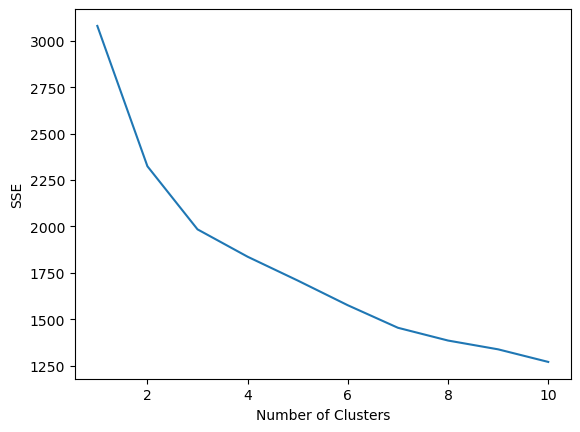

In [1538]:
sse = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init ='random', max_iter=300, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1,11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()
    

In [1539]:
kl = KneeLocator(range(1, 11), sse, curve='convex', direction='decreasing')
optimal_k = kl.elbow

print(f"The best k for your model is : {optimal_k}")

The best k for your model is : 3


Train the K-Means model on the dataset with the number of clusters you have determined.

In [1540]:
kmeans = KMeans(n_clusters=kl.elbow, init ='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df_scaled)
y_pred

c:\Users\edwar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([0, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0,
       2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 0, 1, 2, 0,
       0, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 2, 0, 0, 2, 2, 2, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0,
       1, 2, 2, 1, 0, 2, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 2, 1, 2,

In [1541]:
df = pd.DataFrame(sc.inverse_transform(df_scaled), columns=df.columns)

df['KMeans'] = y_pred

df.head(5)


,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),KMeans
0,3.00,240.00,300.00,4.00,3.00,2.00,"3,500,000,000.00",1.00,3.00,2.00,2.00,0
1,4.00,30.00,60.00,2.00,1.00,2.00,"287,799,000.00",1.00,3.00,2.00,1.00,2
2,3.00,170.00,170.00,5.00,4.00,2.00,"2,699,999,999.00",1.00,1.00,0.00,2.00,0
3,1.00,187.00,250.00,5.00,5.00,2.00,"3,100,000,000.00",1.00,3.00,2.00,2.00,0
4,2.00,350.00,600.00,5.00,5.00,2.00,"5,000,000,000.00",1.00,0.00,2.00,2.00,0


Display the cluster summary in the form of a dataframe:

1. For categorical columns: mode (use pd.Series.mode to find the mode; you do not need to use " " for this attribute).
2. For continuous columns: mean.
3. Cluster results: count.

In [1542]:
# aggregation

cluster_summary = df.groupby('KMeans').agg({
    'Area Category': [pd.Series.mode, 'min', 'max'],
    'Luas Tanah (m2)': ['mean', 'min', 'max'],
    'Luas Bangunan (m2)': ['mean', 'min', 'max'],
    'Jumlah Kamar': [pd.Series.mode, 'min', 'max'],
    'Jumlah Kamar Mandi': [pd.Series.mode, 'min', 'max'],
    'Tingkat/Lantai ': [pd.Series.mode, 'min', 'max'],
    'Harga Penawaran (dari Owner)': ['mean', 'min', 'max'],
    'Terjual/Belum': [pd.Series.mode],
    'Arah Hadap Rumah': [pd.Series.mode],
    'Posisi Rumah': [pd.Series.mode],
    'Lebar Jalan Depan Rumah (ROW)': [pd.Series.mode]
})
cluster_summary.T

KMeans                                             0                 1  \
Area Category                 mode              2.00              1.00   
                              min               1.00              1.00   
                              max               4.00              4.00   
Luas Tanah (m2)               mean            187.38            570.68   
                              min              50.00            240.00   
                              max             525.00          1,561.00   
Luas Bangunan (m2)            mean            243.81            642.22   
                              min              75.00            350.00   
                              max             600.00          1,200.00   
Jumlah Kamar                  mode              4.00              5.00   
                              min               3.00              3.00   
                              max               9.00             13.00   
Jumlah Kamar Mandi            mode              4.00              5.00   
                              min               1.00              2.00   
                              max               7.00             13.00   
Tingkat/Lantai                mode              2.00              2.00   
                              min               1.00              1.00   
                              max               3.00              4.00   
Harga Penawaran (dari Owner)  mean  3,544,236,467.21 16,756,299,779.96   
                              min     645,000,000.00  2,750,000,000.00   
                              max  19,500,000,000.00 99,000,000,000.00   
Terjual/Belum                 mode              1.00              1.00   
Arah Hadap Rumah              mode              3.00              3.00   
Posisi Rumah                  mode              2.00              2.00   
Lebar Jalan Depan Rumah (ROW) mode              2.00              3.00   

KMeans                                             2  
Area Category                 mode              3.00  
                              min               2.00  
                              max               4.00  
Luas Tanah (m2)               mean            118.98  
                              min              14.00  
                              max             495.00  
Luas Bangunan (m2)            mean            117.59  
                              min              14.00  
                              max             495.00  
Jumlah Kamar                  mode              2.00  
                              min               1.00  
                              max               5.00  
Jumlah Kamar Mandi            mode              2.00  
                              min               1.00  
                              max               4.00  
Tingkat/Lantai                mode        [1.0, 2.0]  
                              min               1.00  
                              max               2.00  
Harga Penawaran (dari Owner)  mean  1,506,754,456.12  
                              min     160,000,000.00  
                              max  10,500,000,000.00  
Terjual/Belum                 mode              1.00  
Arah Hadap Rumah              mode              3.00  
Posisi Rumah                  mode              2.00  
Lebar Jalan Depan Rumah (ROW) mode              2.00

In [1543]:
# count data from each cluster

df['KMeans'].value_counts().sort_index()

0    156
1     50
2    102
Name: KMeans, dtype: int64

In [1544]:
# write down your interpretation from the cluster that you have been made

# Cluster 0 : consists of smaller, more affordable properties with a lower average price compared to other clusters.
# Cluster 1 : consists of large, luxurious properties with a high average price, likely in prime locations with more space and higher living standards.
# Cluster 2 : represents properties that are generally more affordable but are smaller and have fewer rooms compared to the other clusters.


## Hierarchical Clustering
Hierarchical clustering uses the agglomerative method.

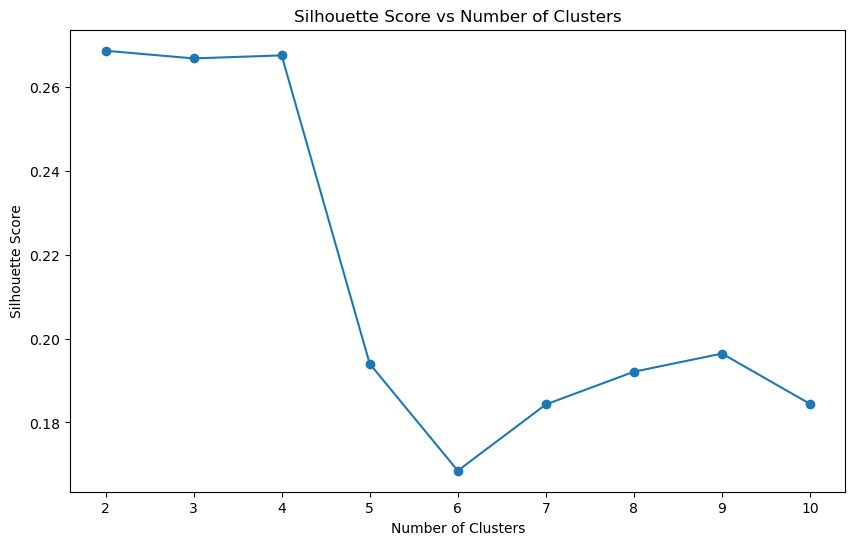

In [1545]:
# The image below is not the final result, if yours looks different, that’s okay.

silhouette_scores = []
k_range = range(2, 11)
df = pd.DataFrame(sc.fit_transform(df), columns=df.columns)

for k in k_range:
    agglomerative = AgglomerativeClustering(n_clusters=k, linkage='ward')
    cluster_labels = agglomerative.fit_predict(df)

    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Perform hierarchical clustering with the Euclidean distance metric and set the number of clusters based on silhouette score.

In [1548]:
# agglomerative clustering
sc = StandardScaler()
df_scaled2 = pd.DataFrame(sc.fit_transform(df), columns=df.columns)
df_scaled2.head(5)

agglo = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_pred = agglo.fit_predict(df_scaled2)

In [1549]:
# Add the cluster labels to the original data that you have been added with kmeans so you have a full dataframe include kmeans and agglo clustering


df = pd.DataFrame(sc.inverse_transform(df_scaled2), columns=df.columns)

df['Agglo'] = y_pred

# show the df
df.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),KMeans,Agglo
0,0.49,0.06,0.16,-0.17,-0.21,0.31,-0.18,0.00,0.84,-0.19,-0.60,-0.92,0
1,1.74,-0.98,-0.97,-1.39,-1.44,0.31,-0.57,0.00,0.84,-0.19,-2.41,1.31,1
2,0.49,-0.28,-0.45,0.44,0.41,0.31,-0.28,0.00,-1.14,-5.45,-0.60,-0.92,0
3,-2.00,-0.20,-0.08,0.44,1.02,0.31,-0.23,0.00,0.84,-0.19,-0.60,-0.92,0
4,-0.75,0.61,1.57,0.44,1.02,0.31,-0.00,0.00,-2.13,-0.19,-0.60,-0.92,0


Display the cluster summary in the form of a dataframe.

In [ ]:
cluster_summary_1 = df.groupby(y_pred).agg({
    'Area Category': [pd.Series.mode, 'min', 'max'],
    'Luas Tanah (m2)': ['mean', 'min', 'max'],
    'Luas Bangunan (m2)': ['mean', 'min', 'max'],
    'Jumlah Kamar': [pd.Series.mode, 'min', 'max'],
    'Jumlah Kamar Mandi': [pd.Series.mode, 'min', 'max'],
    'Tingkat/Lantai ': [pd.Series.mode, 'min', 'max']
})
cluster_summary_1 = cluster_summary_1.rename_axis("Agglo")
cluster_summary_1

Area Category           Luas Tanah (m2)                 \
               mode  min  max            mean   min      max   
Agglo                                                          
0              2.00 1.00 4.00          280.41 50.00 1,561.00   
1              3.00 2.00 4.00          118.98 14.00   495.00   

      Luas Bangunan (m2)                Jumlah Kamar             \
                    mean   min      max         mode  min   max   
Agglo                                                             
0                 340.51 75.00 1,200.00         5.00 3.00 13.00   
1                 117.59 14.00   495.00         2.00 1.00  5.00   

      Jumlah Kamar Mandi            Tingkat/Lantai             
                    mode  min   max            mode  min  max  
Agglo                                                          
0                   4.00 1.00 13.00            2.00 1.00 4.00  
1                   2.00 1.00  4.00      [1.0, 2.0] 1.00 2.00

In [ ]:
cluster_summary_2 = df.groupby(y_pred).agg({
    'Harga Penawaran (dari Owner)': ['mean', 'min', 'max'],
    'Terjual/Belum': [pd.Series.mode],
    'Arah Hadap Rumah': [pd.Series.mode],
    'Posisi Rumah': [pd.Series.mode],
    'Lebar Jalan Depan Rumah (ROW)': [pd.Series.mode]
})
cluster_summary_2 = cluster_summary_2.rename_axis("Agglo")
cluster_summary_2

Harga Penawaran (dari Owner)                                   \
                              mean            min               max   
Agglo                                                                 
0                 6,751,047,950.88 645,000,000.00 99,000,000,000.00   
1                 1,506,754,456.12 160,000,000.00 10,500,000,000.00   

      Terjual/Belum Arah Hadap Rumah Posisi Rumah  \
               mode             mode         mode   
Agglo                                               
0              1.00             3.00         2.00   
1              1.00             3.00         2.00   

      Lebar Jalan Depan Rumah (ROW)  
                               mode  
Agglo                                
0                              2.00  
1                              2.00

In [ ]:
df['Agglo'].value_counts().sort_index()

0    206
1    102
Name: Agglo, dtype: int64

In [ ]:
# write down your interpretation from the cluster that you have been made

# Cluster 1 : Luxury buyers seeking larger, high-end properties with higher price points.
# Cluster 2 : Budget-conscious buyers searching for smaller, more affordable properties.

**Hierarchical Visualization**

Single Linkage

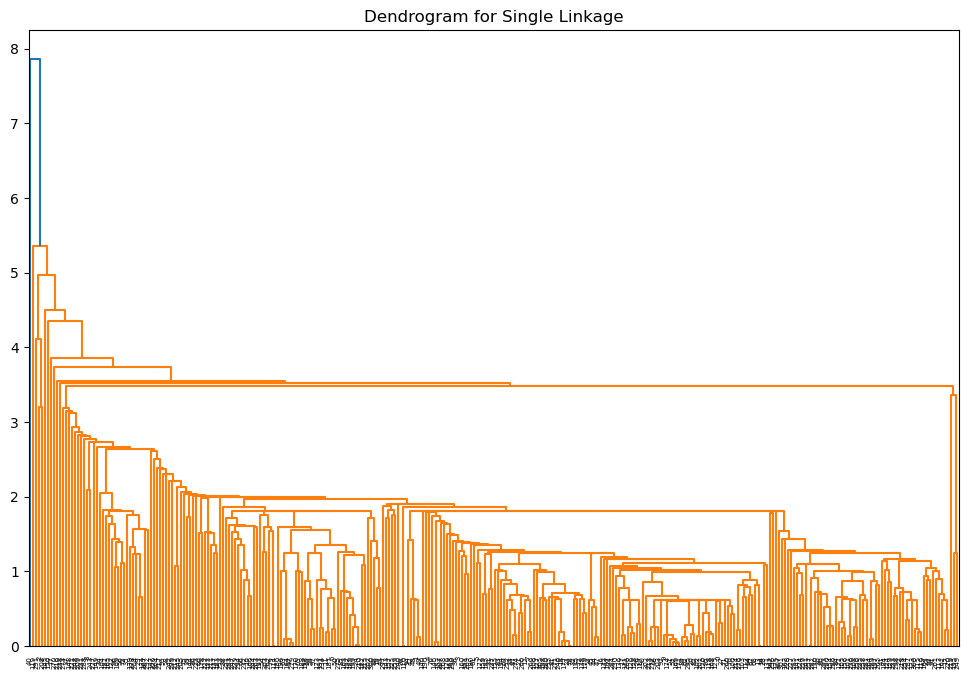

In [ ]:

plt.figure(figsize=(12, 8))
plt.title("Dendrogram for Single Linkage")
dend = sch.dendrogram(sch.linkage(df_scaled, method='single'))
plt.show()

complete linkage

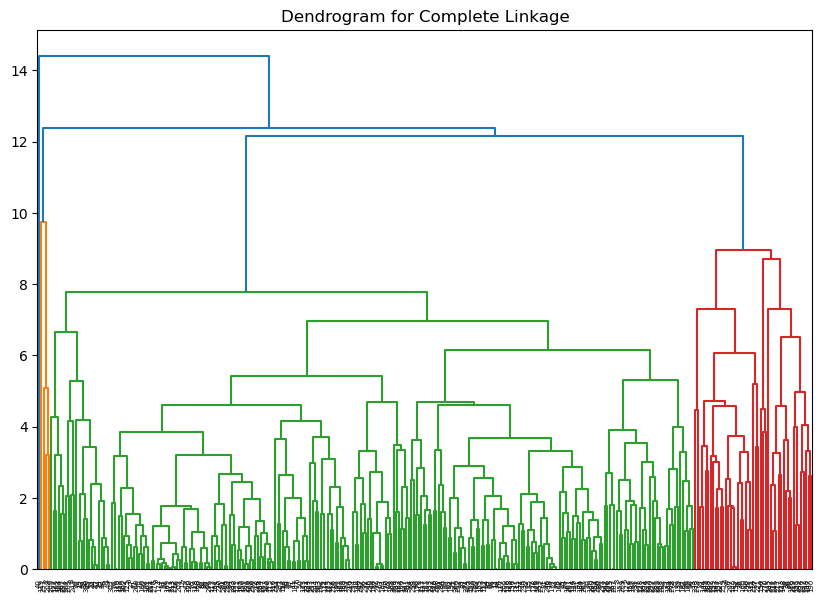

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Complete Linkage")
dend = sch.dendrogram(sch.linkage(df_scaled, method='complete'))
plt.show()

average linkage

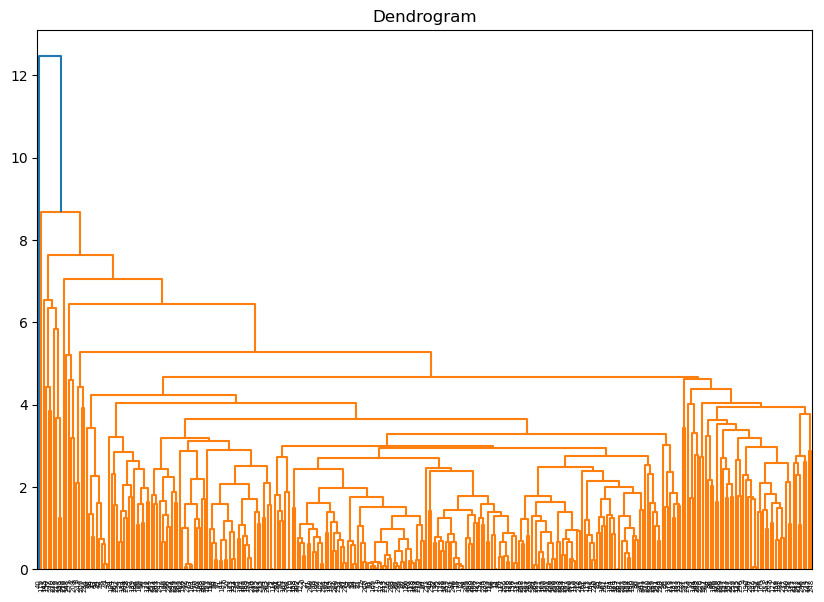

In [ ]:

plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = sch.dendrogram(sch.linkage(df_scaled, method='average'))
plt.show()

ward method

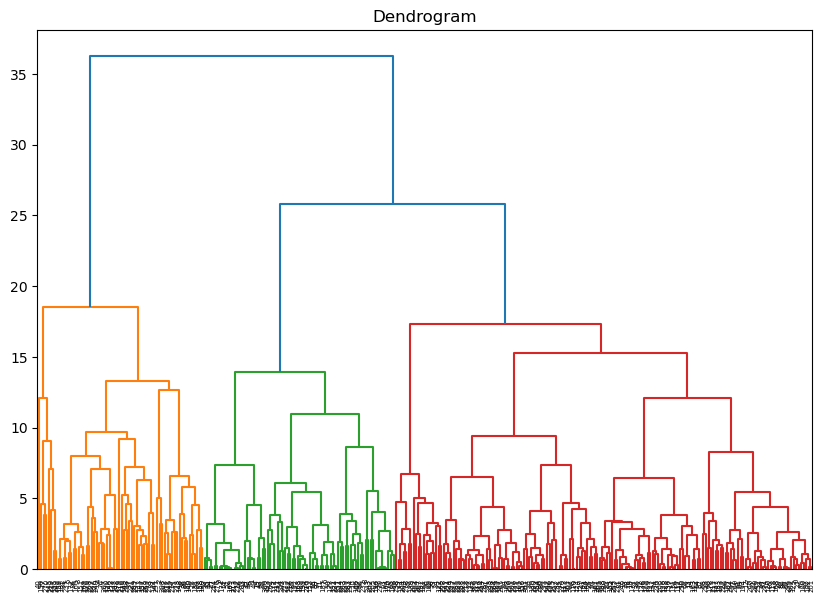

In [ ]:

plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.show()